# Cadre du projet
pour ce projet j'ai décider de travailler sur un modèle de crédit scoring basé sur le comportement de l’emprunteur.  Le crédit scoring est une méthode qui évalue le niveau du risque associé à un dossier de crédit afin de prévoir la solvabilité du demandeur de ce crédit. ce travaille va se faire à l'aide d'un dataset d'une banque qui contient des données sur ces clients et les caractéristiques de ces clients, mon modèle permetra à la fin de classer les clients comme : Bon Payeur ou Mauvais Payeur. A cet effet, je vais utiliser deux méthodes : la Régression Logistique et le K-plus proches voisins (K-NN). Pour la validation et la comparaison de la qualité des modèles obtenus, je vais utiliser la matrice de classement ou de confusion et les autres métriques.

In [1]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import random
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics 
from math import sqrt
from scipy.stats import chi2_contingency
from sklearn.utils import resample
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

# data laoding

In [2]:
df=pd.read_csv('dataset_credit_scoring.csv')
df.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1.0,1303834.0,23.0,3.0,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3.0,13.0,no
1,2.0,7574516.0,40.0,10.0,single,rented,no,Software_Developer,Parbhani,Maharashtra,9.0,13.0,no
2,3.0,3991815.0,66.0,4.0,married,rented,no,Technical_writer,Alappuzha,Kerala,4.0,10.0,no
3,4.0,6256451.0,41.0,2.0,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2.0,12.0,yes
4,5.0,5768871.0,47.0,11.0,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3.0,14.0,yes


**Description des variables de la base de données **
Id : Identification 
 
Income :	Revenu de l’individu,  
Age :	Age de l’individu, 
Expérience :	Expérience professionnelle en nombre d’années, 
Married/Single :	Situation matrimoniale,
House_Ownership :	Situation de location,
Car_Ownership :	Possession de voiture,
Profession :	Profession de l’individu,
City :	Ville de résidence, 
State :	Etat de résidence,
Current_Job_Yrs :	Nombre d’années dans le poste actuel,
Current_House_Yrs :	Nombre d’années dans la résidence actuelle,
Risk_Flag :	Défaut de remboursement 



In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199999 entries, 0 to 199998
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Id                 199993 non-null  float64
 1   Income             199888 non-null  float64
 2   Age                199993 non-null  float64
 3   Experience         199993 non-null  float64
 4   Married/Single     199973 non-null  object 
 5   House_Ownership    199993 non-null  object 
 6   Car_Ownership      199993 non-null  object 
 7   Profession         199939 non-null  object 
 8   CITY               199939 non-null  object 
 9   STATE              199939 non-null  object 
 10  CURRENT_JOB_YRS    199781 non-null  float64
 11  CURRENT_HOUSE_YRS  199993 non-null  float64
 12  Risk_Flag          199993 non-null  object 
dtypes: float64(6), object(7)
memory usage: 19.8+ MB


La base comporte deux-cent cinquante-deux milles (252 000) observations  avec sept variables quantitatives et six variables qualitatives. 

In [4]:
df1=df.drop(["Id","Risk_Flag"],axis=1)

alors j'ai droper ces colonne car se sont des valeurs numérique qui risque d'apparaitre dans la commande de describe(), alors qu'il nos pas de signification dans cette partie

In [5]:
df1.describe()

,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS
count,1.998880e+05,199993.000000,199993.000000,199781.000000,199993.000000
mean,4.997014e+06,49.963684,10.105919,6.341559,11.995575
std,2.877116e+06,17.067081,5.994741,3.643475,1.396282
min,1.031000e+04,21.000000,0.000000,0.000000,10.000000
25%,2.503015e+06,35.000000,5.000000,4.000000,11.000000
50%,5.002101e+06,50.000000,10.000000,6.000000,12.000000
75%,7.475446e+06,65.000000,15.000000,9.000000,13.000000
max,9.999180e+06,79.000000,20.000000,14.000000,14.000000


ici nous avons les informations statistique telles que la moyenne, l’écart-type, les trois quartiles, le minimum et le maximum sur chacune des variables qui y figurent. Il indique que le revenu moyen est 4 997 117, le maximum de 9 999 938 et le minimum de 10310. L’individu le plus âgé a 79 ans tandis que le plus jeune est âgé de 21 ans, l’âge moyen étant de 49 ans.  

# datapréprocessing

In [6]:
df.isnull().sum()

Id                     6
Income               111
Age                    6
Experience             6
Married/Single        26
House_Ownership        6
Car_Ownership          6
Profession            60
CITY                  60
STATE                 60
CURRENT_JOB_YRS      218
CURRENT_HOUSE_YRS      6
Risk_Flag              6
dtype: int64

nous avons quelque données manquantes nous allons procèdé à leurs remplacement

In [7]:
df=df.fillna(method='ffill')
df.isnull().sum()

Id                   0
Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

Alors je vient de remplacer les données manquantes par la méthode interpolation qui est un outil mathémathique très utile pour le remplacement de données manquante

:

# visualisation et exploration 

Text(0, 0.5, 'counts')

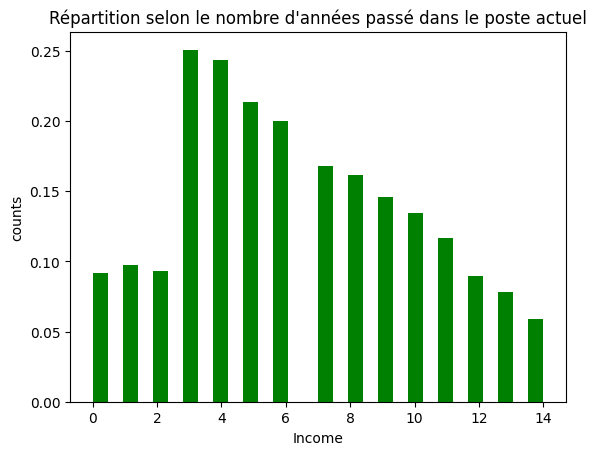

In [8]:
x=df['CURRENT_JOB_YRS']
plt.hist(x, bins=30, density=True, color='g')
plt.title("Répartition selon le nombre d'années passé dans le poste actuel")
plt.xlabel("Income")
plt.ylabel("counts")

Le graph montre qu’il y’a plus d’individus qui ont passés 3 à 6 ans dans leurs postes actuels qu’il y’en a entre [0 – 2] ans ou encore entre [12 - 14] ans. 

Text(0.5, 0, 'Income')

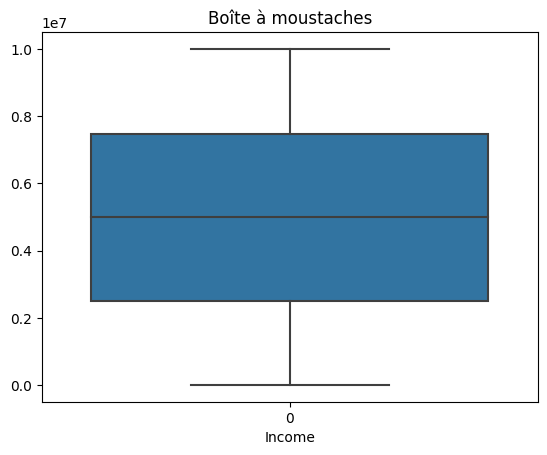

In [9]:


sns.boxplot(df['Income'])
plt.title('Boîte à moustaches')
plt.xlabel('Income')





La boite à moustaches du revenu a permis de vérifier que la variable ne contient pas de valeur aberrante ou atypique.

Text(0, 0.5, 'counts')

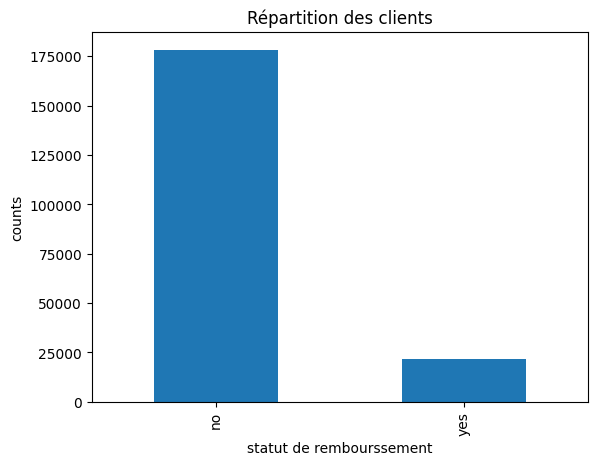

In [10]:
df['Risk_Flag'].value_counts().plot.bar()
plt.title("Répartition des clients")
plt.xlabel("statut de rembourssement")
plt.ylabel("counts")

Nous pouvons voir ici le nombre de cliennts en défaut est largement superieur aux clients qui ne sont pas en défaut de payement dés ici on peut prévoir que nombre modèle risque de classer plus dans la classe des clients en défaut avec cette déshéquilibre de classe.

Text(0, 0.5, 'counts')

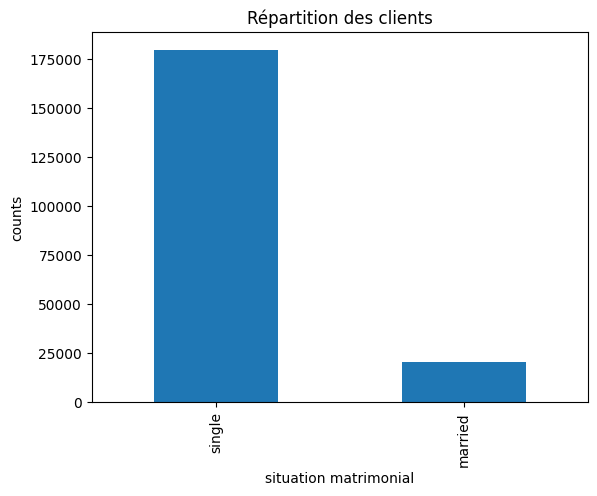

In [11]:
fig, ax = plt.subplots()
df['Married/Single'].value_counts().plot.bar()
plt.title("Répartition des clients")
plt.xlabel("situation matrimonial")
plt.ylabel("counts")


Le graph  montre qu’il y’a plus de célibataires que de mariés

# Analyse de contingence

Pour pouvoir comprendre les critères qui font qu’une personne soit potentiellement défaillante 
ou non, je vais  analyser les relations entre le défaut de remboursement et certaines 
caractéristiques qualitatives des emprunteurs.

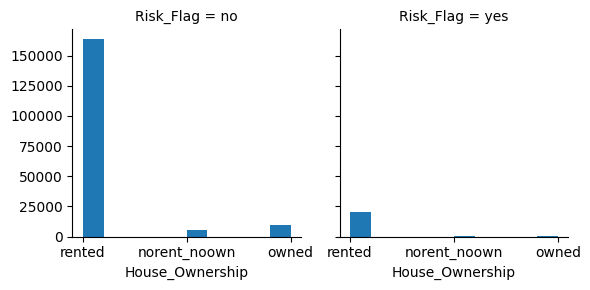

In [12]:
df=pd.read_csv('dataset_credit_scoring.csv')
g=sns.FacetGrid(df, col='Risk_Flag')
g.map(plt.hist,'House_Ownership')

Le graph révèle qu’il y’a plus de locataires en défaut de remboursement que de 
propriétaires ou d’hébergés.

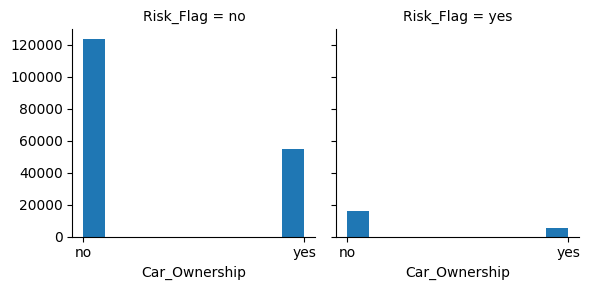

In [13]:
df=pd.read_csv('dataset_credit_scoring.csv')
g=sns.FacetGrid(df, col='Risk_Flag')
g.map(plt.hist,'Car_Ownership')

Le graph indique qu’il y’a plus d’individus non véhiculés tombés en défaut que de 
véhiculés en défaut.

C:\Users\rezga\AppData\Local\Temp\ipykernel_9728\3439877949.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  p=sns.heatmap(df.corr(), annot=True,cmap='RdYlGn')


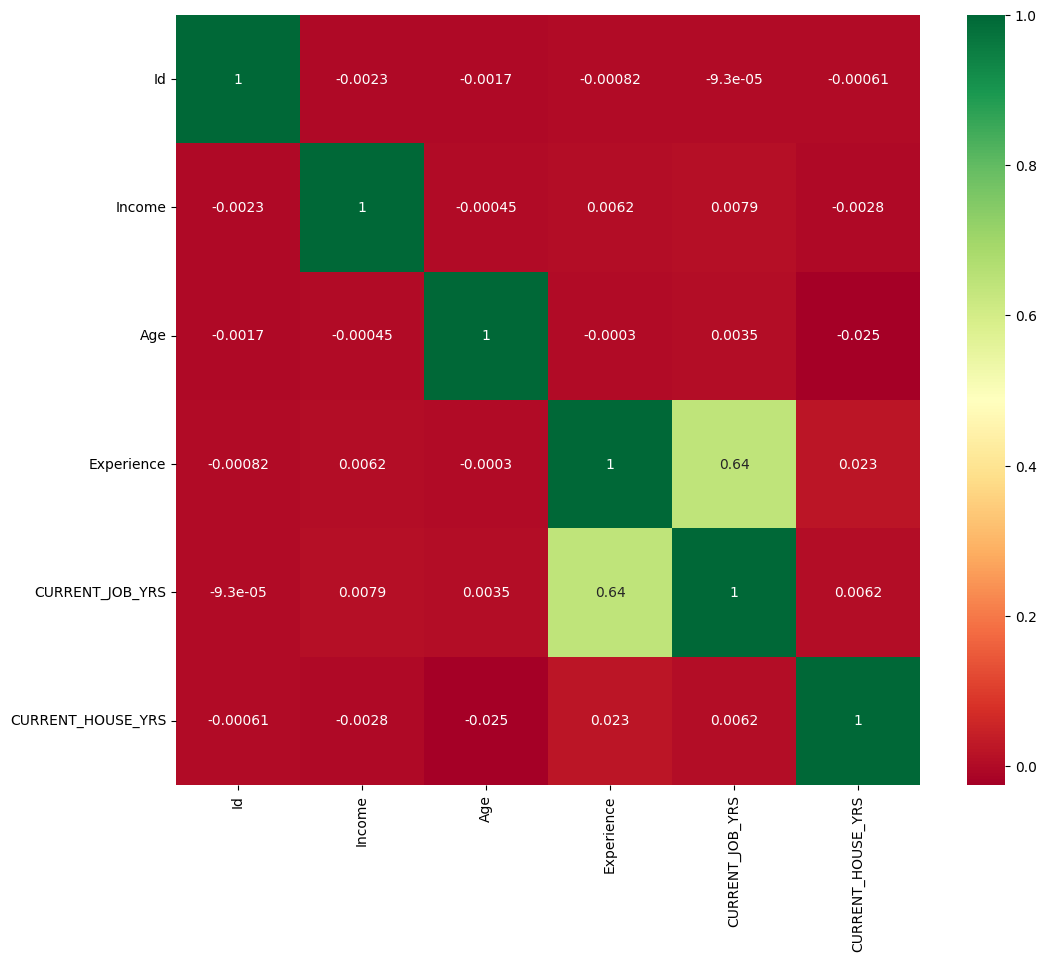

In [14]:

plt.figure(figsize=(12,10))
p=sns.heatmap(df.corr(), annot=True,cmap='RdYlGn')

La matrice de corrélation révèle que les variables ne sont pas corrélées entre elles, à l’exception de l’expérience et le nombre d’années dans le poste actuel. Une forte corrélation entre les variables aurait été négative car elles apporteraient la même information ce dont nous n’avons pas besoin. Chaque variable doit pouvoir discriminer les individus de manière unique. 

**préparation de mes données pour l'apprentissage Avant de procéder à la modélisation, il faut d’abord s’assurer que les données soient prêtent. La phase de préparation passe par l’apurement, le recodage et la normalisation **

# codification de données

In [15]:
features = ['Car_Ownership','Profession','CITY','STATE','House_Ownership']
label_encoder = LabelEncoder()

for col in features:
    df[col] = label_encoder.fit_transform(df[col])
   


alors dans cette partie j'ai codifier certain des données de manière automatique car la connaissance de leurs code numérique  n'est trop utile

In [16]:
dict={
    "no":0,
    "yes": 1
   }
df.replace(dict,inplace=True)
df.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1.0,1303834.0,23.0,3.0,single,2,0,33,251,13,3.0,13.0,0.0
1,2.0,7574516.0,40.0,10.0,single,2,0,43,227,14,9.0,13.0,0.0
2,3.0,3991815.0,66.0,4.0,married,2,0,47,8,12,4.0,10.0,0.0
3,4.0,6256451.0,41.0,2.0,single,2,1,43,54,17,2.0,12.0,1.0
4,5.0,5768871.0,47.0,11.0,single,2,0,11,296,22,3.0,14.0,1.0


In [17]:
dict={
    "single":0,
    "married": 1
   }
df.replace(dict,inplace=True)
df.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1.0,1303834.0,23.0,3.0,0.0,2,0,33,251,13,3.0,13.0,0.0
1,2.0,7574516.0,40.0,10.0,0.0,2,0,43,227,14,9.0,13.0,0.0
2,3.0,3991815.0,66.0,4.0,1.0,2,0,47,8,12,4.0,10.0,0.0
3,4.0,6256451.0,41.0,2.0,0.0,2,1,43,54,17,2.0,12.0,1.0
4,5.0,5768871.0,47.0,11.0,0.0,2,0,11,296,22,3.0,14.0,1.0


dans cette partie je vient de codifier mes données binaire de la méthode manuel pour pouvoir ensuite faire une interprétatation plus aisé même après la codification

# normalisation

La normalisation est nécessaire car elle facilite l’apprentissage des modèles de Machine Learning qui sont basés sur la descente du gradient, les calculs de distance ou les calculs de variance. **texte en gras**

In [18]:
df_norm = (df - df.min()) / (df.max() - df.min())
df_norm

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,0.000000,0.129497,0.034483,0.15,0.0,0.666667,0.0,0.647059,0.791798,0.448276,0.214286,0.75,0.0
1,0.000005,0.757263,0.327586,0.50,0.0,0.666667,0.0,0.843137,0.716088,0.482759,0.642857,0.75,0.0
2,0.000010,0.398594,0.775862,0.20,1.0,0.666667,0.0,0.921569,0.025237,0.413793,0.285714,0.00,0.0
3,0.000015,0.625310,0.344828,0.10,0.0,0.666667,0.5,0.843137,0.170347,0.586207,0.142857,0.50,1.0
4,0.000020,0.576498,0.448276,0.55,0.0,0.666667,0.0,0.215686,0.933754,0.758621,0.214286,1.00,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
199994,0.999980,0.799064,0.396552,0.75,0.0,0.666667,0.0,0.431373,0.640379,0.034483,0.285714,0.25,0.0
199995,0.999985,0.735539,0.500000,0.65,0.0,0.666667,0.5,0.431373,0.167192,0.448276,0.500000,1.00,0.0
199996,0.999990,0.711347,0.534483,0.85,0.0,0.666667,0.0,0.725490,0.252366,0.172414,1.000000,0.25,0.0
199997,0.999995,0.152409,1.000000,0.10,0.0,0.666667,0.0,0.529412,0.362776,0.862069,0.142857,0.50,0.0


j'ai normaliser mes données avec la méthode MinMax qui les met entre 0 et 1 pour permettre un meilleur apprentissage

# Logistic regression 

alors cette partie consiste a faire de la regression logistic pour classer les clients de la banque dans deux catégories ce qui présente un défaut de payement **(code=0)** et ce qui ne le sont pas **(code=1)**

In [19]:
df_norm =df_norm .fillna(method='ffill')
df_norm .isnull().sum()
X = df_norm.drop(["Risk_Flag"], axis=1)
X_=X.to_numpy()
#X=df_norm['Message']
y=df_norm['Risk_Flag']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.18, random_state=40)
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
y_pred = LogReg.predict(X_test)

dans la partie ci-dessous j'ai divisé tout d'abord mes données en train qui est 82% et teste en 18% puis j'ai entrainner le modele

# Evaluation du modèle

<Axes: >

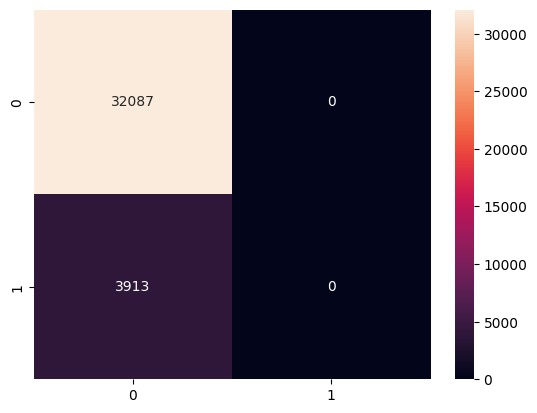

In [20]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_matrix, annot = True, fmt ="d")


à l'aide de la matrice de confusion on a conclue que notre modèle à reussi à classier 32087 dans la partie des clients qui présente un défaut de payement et il n'a rien pu classer dans les partie des clients qui ne présente pas de défaut de payement. j'en clonclue que le modèle n'est pas du tout **satisfaisante**

In [21]:

mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)
rmse



0.32968840508037955

notre modèle présente 32% d'erreur c'est n'est pas du tout acceptable pour un modèle de machine learning

In [22]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.89      1.00      0.94     32087
         1.0       0.00      0.00      0.00      3913

    accuracy                           0.89     36000
   macro avg       0.45      0.50      0.47     36000
weighted avg       0.79      0.89      0.84     36000



c:\Users\rezga\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\rezga\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\rezga\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

cette vient confirmer les resultat données par nos précedente métrique, on peut observer qu'il y a une précision de 89% le classement des clients en défaut et 0% des clients non en défaut de payement.

alors je passe que mon modèle à été mal entrainner du fait d'un déséquilibre de classe entre le nombre de client en défaut et les clients non en défaut. pour palier à se problème j'ai essayer de résoudre le problème de déséquilibre

# Equilibrage des données

In [23]:

rus = RandomUnderSampler()
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)
ros = RandomOverSampler()
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
ros = RandomOverSampler()
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)




le code ci-dessous permet d'équilibré les données pour l'entrainnement

In [24]:
LogReg1 = LogisticRegression()
LogReg1.fit(X_resampled, y_resampled)
y_pred = LogReg1.predict(X_test)

# Evalution du modèle

<Axes: >

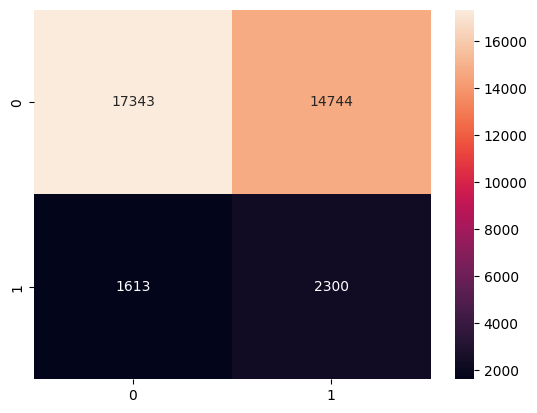

In [25]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_matrix, annot = True, fmt ="d")



après l'équilibrage des classer nons observons que la matrice de confusion nous donne les résultats suivantes. notre modèle à pu classer cette fois 17358 dans la partie des clients en défaut dans la bonne classe et 14729 dans la mausaise classe et une classification 2295 des clients non en défaut dans la bonne classe et 1618 dans la mauvaise classe

In [26]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.91      0.54      0.68     32087
         1.0       0.13      0.59      0.22      3913

    accuracy                           0.55     36000
   macro avg       0.52      0.56      0.45     36000
weighted avg       0.83      0.55      0.63     36000



alors nous voyons que notre modèle à changer de précision de manière positive 91% pour la classification des clients en défaut et 14% de classification pour des les clients non en défaut.

**En conclusion notre modèle est partiellement satisfaisant donc c'est pas un bon modèle**

# classification KNN

**alors j'ai décidé d'utilisé la classification KNN qui est basée sur le calcul de distance et de classifier selon le ou les voisin les plus proche bien que cette méthode est plus adéquat pour une taget qui a plus de deux classes différents je vais l'utilisé dans ce cas en considérant que la classification l ogisticn'est qu'un cas praticlier**

Accuracy: 54.56388888888889 %


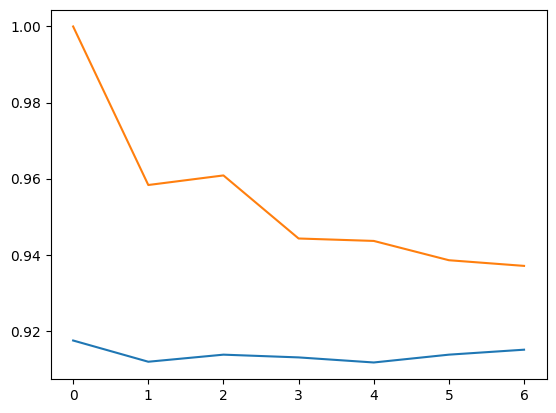

In [27]:
from sklearn.neighbors import KNeighborsClassifier
test_scores = []
train_scores = []

for i in range(1,8):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))
    
print("Accuracy:", metrics.accuracy_score(y_test, y_pred)* 100, "%")

plt.plot(test_scores, label='test scores')
plt.plot(train_scores, label='train scores')

In [28]:
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 91.74444444444444 % and k = [1]


In [29]:
# Instancier le classificateur KNN
from sklearn.neighbors import KNeighborsClassifier
k = 3
knn = KNeighborsClassifier(n_neighbors=k)

# Entraîner le classificateur sur les données d'entraînement
knn.fit(X_train, y_train)

# Prédire les étiquettes pour les données de test
y_pred = knn.predict(X_test)

# Afficher la matrice de confusion

# Evalution 

[[30556  1531]
 [ 1575  2338]]


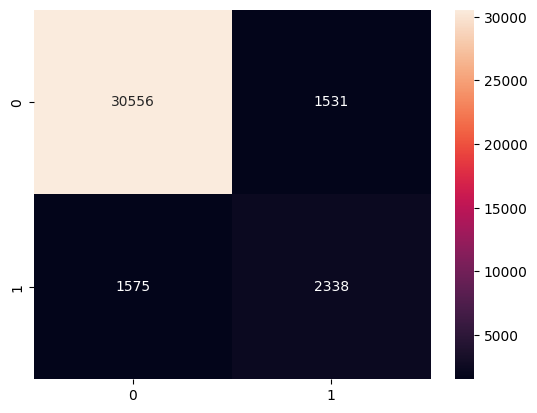

In [30]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm , annot = True, fmt ="d")
print(cm)

pour le KNN nous voyons que le modèle à pu classer 30488 clients en défaut dans la bonne classe et 1599 dans une mauvaise classe pour les clients non en défaut il 2332 qui on était qui on étaient bien classer et 1581 qui on étaient mal classer

In [31]:
class_report = classification_report(y_test, y_pred)

# Afficher le rapport de classification
print("Rapport de classification :")
print(class_report)

Rapport de classification :
              precision    recall  f1-score   support

         0.0       0.95      0.95      0.95     32087
         1.0       0.60      0.60      0.60      3913

    accuracy                           0.91     36000
   macro avg       0.78      0.77      0.78     36000
weighted avg       0.91      0.91      0.91     36000



après l'utilisation de KNN nous observons que notre modèle est beaucoup plus satisfaisante avec 95% de précision pour la classification des clients en défaut et 62% de précision pour les clients non en défaut.

# conclusion
Après avoir analysé  les deux méthodes, nous pouvons à présent les comparer. 
Les résultats ont montré que l’algorithme du K-NN a une meilleure capacité prédictive que le modèle de régression logistique car elle a un meilleur taux de bon classement et de précision à celle de la régression logistique, ce qui permet de conclure que la méthode du K-plus proches voisins est plus avantageuse que celle de la régression logistique dans ce cas. 